In [41]:
#import lightfm
from math import sqrt
from time import time
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cosine, euclidean, hamming
import ast
from sklearn.metrics.pairwise import cosine_similarity
#from lightfm.evaluation import precision_at_k, auc_score
#from lightfm import LightFM, cross_validation
import random
from scipy import sparse
import warnings
from scipy.spatial.distance import cdist
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import IFrame
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import os
import numpy as np
import pandas as pd
import seaborn as sns
#import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
%matplotlib inline

In [237]:
#Data Source
#https://www.kaggle.com/code/tj00001/building-music-recommendation-system-using-spotify/input

In [238]:
#Set directory path
path = '/Users/HP/OneDrive/Documents/MSC Project/data'


In [239]:
#Importing the dataset
spotify_data = pd.read_csv(path +"/data.csv")
spotify_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [240]:
spotify_data.iloc[34]

valence                                 0.161
year                                     1921
acousticness                            0.384
artists                   ['Mehmet Kemiksiz']
danceability                             0.65
duration_ms                            187977
energy                                  0.443
explicit                                    0
id                     17gxBcWBIkEFUZA0vN5khu
instrumentalness                          0.0
key                                         6
liveness                                0.375
loudness                               -9.478
mode                                        0
name                Bir Zamanlar Bizde Millet
popularity                                  0
release_date                             1921
speechiness                            0.0334
tempo                                 130.009
Name: 34, dtype: object

In [241]:
#Check the clums in the dataset
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [242]:
#Check for missing values
spotify_data.isna().mean()*100

valence             0.0
year                0.0
acousticness        0.0
artists             0.0
danceability        0.0
duration_ms         0.0
energy              0.0
explicit            0.0
id                  0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
name                0.0
popularity          0.0
release_date        0.0
speechiness         0.0
tempo               0.0
dtype: float64

In [243]:
#Text pre-processing

#Removing the 'brackets []' and '' at the begining and end of the artists names
spotify_data['artists'] = spotify_data['artists'].map(
    lambda x: x.lstrip("['").rstrip("']"))
spotify_data.head()


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"Sergei Rachmaninoff', 'James Levine', 'Berline...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [244]:
spotify_data = spotify_data.sample(4000, random_state=120).reset_index()
spotify_data=spotify_data.drop('index',1)
spotify_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.288,2005,0.0404,Nickelback,0.577,119787,0.905,0,5BK5IvPzmTZBGsCnYRjSue,0.00000,4,0.0685,-5.018,0,We Will Rock You,57,2005,0.1140,80.974
1,0.580,1987,0.0184,Foreigner,0.622,250773,0.873,0,4aFNkzXifTfkc452lMHmym,0.00035,9,0.0997,-7.030,0,Heart Turns to Stone,36,1987-11-25,0.0339,120.142
2,0.744,1925,0.9420,Jelly Roll Morton,0.711,174427,0.635,0,1Wj1hBJKbEgyFHzraDL9aD,0.88200,0,0.0744,-5.458,1,The Chant,0,1925,0.0479,104.181
3,0.960,1983,0.5130,Los Liricos De Teran,0.847,180080,0.658,0,44vPB2KOz5sKfVrZAlPhFO,0.00000,2,0.0892,-8.310,1,Roberto Ruíz,34,1983-01-01,0.0810,112.351
4,0.265,1973,0.0218,Alice Cooper,0.328,258600,0.497,0,2zyRVV93ijUwH1SyrPcTRR,0.00519,0,0.4870,-12.033,1,Hello Hooray,37,1973,0.0286,94.567


In [245]:
#Perfrom some EDA
spotify_data.artists.nunique()
#3408 Unique artits in the dataset

2730

In [246]:
spotify_data.id.nunique()
#170653 Unique artits in the dataset

4000

In [247]:
top_10 = pd.DataFrame()
top_10['frequency']=spotify_data['artists'].value_counts(
).sort_values(ascending=False).head(10)

In [248]:
top_10

,frequency
Эрих Мария Ремарк,26
Эрнест Хемингуэй,24
The Rolling Stones,23
Francisco Canaro,19
Fleetwood Mac,14
Elvis Presley,13
Ignacio Corsini,13
The Beach Boys,13
Johnny Cash,12
Oscar Peterson,11


Text(0.5, 1.0, 'Top 10 Artists')

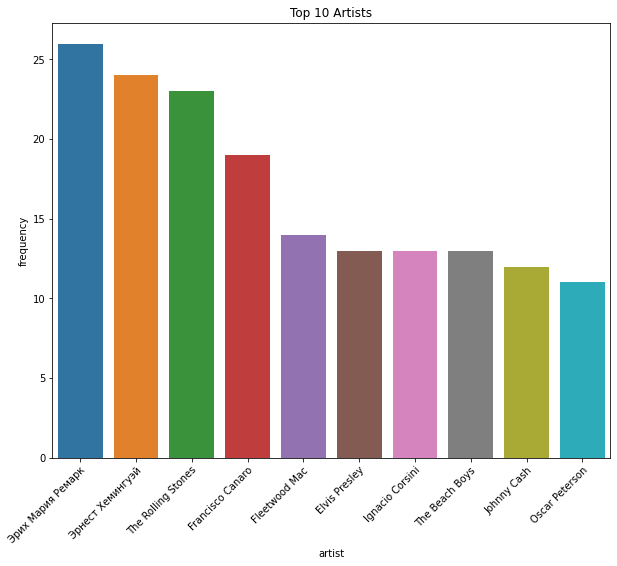

In [249]:
fig = plt.figure(figsize=(10, 8))
sns.barplot(x=top_10.index,y = top_10['frequency'])
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor')
plt.xlabel('artist')
plt.title('Top 10 Artists')

In [250]:
#Content based filtering 


In [251]:
spotify_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.288,2005,0.0404,Nickelback,0.577,119787,0.905,0,5BK5IvPzmTZBGsCnYRjSue,0.00000,4,0.0685,-5.018,0,We Will Rock You,57,2005,0.1140,80.974
1,0.580,1987,0.0184,Foreigner,0.622,250773,0.873,0,4aFNkzXifTfkc452lMHmym,0.00035,9,0.0997,-7.030,0,Heart Turns to Stone,36,1987-11-25,0.0339,120.142
2,0.744,1925,0.9420,Jelly Roll Morton,0.711,174427,0.635,0,1Wj1hBJKbEgyFHzraDL9aD,0.88200,0,0.0744,-5.458,1,The Chant,0,1925,0.0479,104.181
3,0.960,1983,0.5130,Los Liricos De Teran,0.847,180080,0.658,0,44vPB2KOz5sKfVrZAlPhFO,0.00000,2,0.0892,-8.310,1,Roberto Ruíz,34,1983-01-01,0.0810,112.351
4,0.265,1973,0.0218,Alice Cooper,0.328,258600,0.497,0,2zyRVV93ijUwH1SyrPcTRR,0.00519,0,0.4870,-12.033,1,Hello Hooray,37,1973,0.0286,94.567


In [252]:
#Select the music audio features
#use the index as song_id
spotify_data['song_id'] = spotify_data.index
spotify_data.head()


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,song_id
0,0.288,2005,0.0404,Nickelback,0.577,119787,0.905,0,5BK5IvPzmTZBGsCnYRjSue,0.00000,4,0.0685,-5.018,0,We Will Rock You,57,2005,0.1140,80.974,0
1,0.580,1987,0.0184,Foreigner,0.622,250773,0.873,0,4aFNkzXifTfkc452lMHmym,0.00035,9,0.0997,-7.030,0,Heart Turns to Stone,36,1987-11-25,0.0339,120.142,1
2,0.744,1925,0.9420,Jelly Roll Morton,0.711,174427,0.635,0,1Wj1hBJKbEgyFHzraDL9aD,0.88200,0,0.0744,-5.458,1,The Chant,0,1925,0.0479,104.181,2
3,0.960,1983,0.5130,Los Liricos De Teran,0.847,180080,0.658,0,44vPB2KOz5sKfVrZAlPhFO,0.00000,2,0.0892,-8.310,1,Roberto Ruíz,34,1983-01-01,0.0810,112.351,3
4,0.265,1973,0.0218,Alice Cooper,0.328,258600,0.497,0,2zyRVV93ijUwH1SyrPcTRR,0.00519,0,0.4870,-12.033,1,Hello Hooray,37,1973,0.0286,94.567,4


In [253]:
#Select teh audio features columns
audio_features = spotify_data[['danceability', 'energy', "valence",
           "speechiness", "instrumentalness", "acousticness","energy","tempo"]]
#set the audio features index to song_id from original df
audio_features.index = spotify_data['song_id']
audio_features.head()

,danceability,energy,valence,speechiness,instrumentalness,acousticness,energy,tempo
song_id,,,,,,,,
0,0.577,0.905,0.288,0.1140,0.00000,0.0404,0.905,80.974
1,0.622,0.873,0.580,0.0339,0.00035,0.0184,0.873,120.142
2,0.711,0.635,0.744,0.0479,0.88200,0.9420,0.635,104.181
3,0.847,0.658,0.960,0.0810,0.00000,0.5130,0.658,112.351
4,0.328,0.497,0.265,0.0286,0.00519,0.0218,0.497,94.567


Text(0.5, 1.0, 'Distribution of Danceability features')

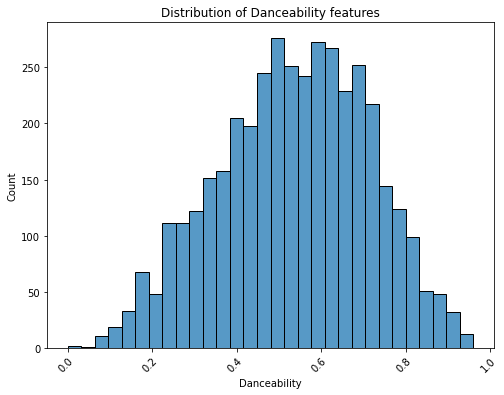

In [254]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(audio_features.danceability)
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor')
plt.xlabel('Danceability')
plt.title('Distribution of Danceability features')

Text(0.5, 1.0, 'Distribution of Speechiness features')

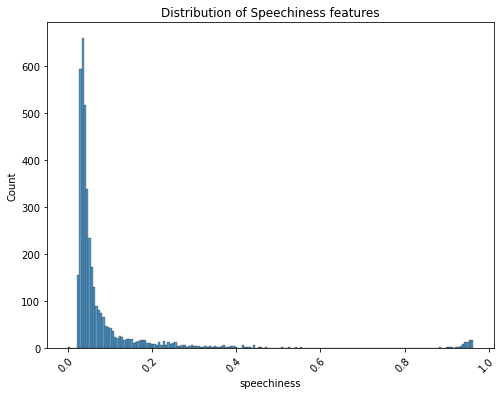

In [255]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(audio_features.speechiness)
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor')
plt.xlabel('speechiness')
plt.title('Distribution of Speechiness features')

Text(0.5, 1.0, 'Distribution of Tempo features')

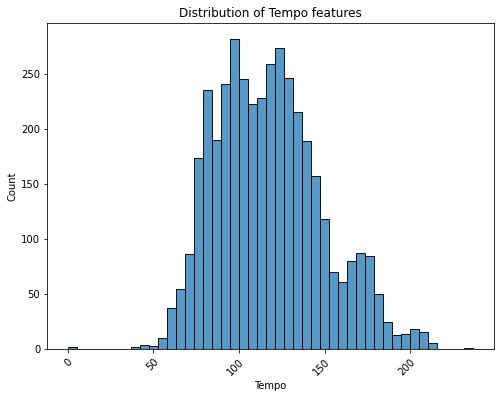

In [256]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(audio_features.tempo)
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor')
plt.xlabel('Tempo')
plt.title('Distribution of Tempo features')


In [257]:
corr = audio_features.corr()
corr

,danceability,energy,valence,speechiness,instrumentalness,acousticness,energy,tempo
danceability,1.000000,0.224577,0.545063,0.247981,-0.275108,-0.267371,0.224577,-0.011079
energy,0.224577,1.000000,0.368338,-0.063000,-0.286092,-0.750471,1.000000,0.253818
valence,0.545063,0.368338,1.000000,0.052220,-0.178210,-0.196928,0.368338,0.172427
speechiness,0.247981,-0.063000,0.052220,1.000000,-0.129410,-0.066133,-0.063000,-0.021717
instrumentalness,-0.275108,-0.286092,-0.178210,-0.129410,1.000000,0.342847,-0.286092,-0.096284
acousticness,-0.267371,-0.750471,-0.196928,-0.066133,0.342847,1.000000,-0.750471,-0.218368
energy,0.224577,1.000000,0.368338,-0.063000,-0.286092,-0.750471,1.000000,0.253818
tempo,-0.011079,0.253818,0.172427,-0.021717,-0.096284,-0.218368,0.253818,1.000000


<AxesSubplot:>

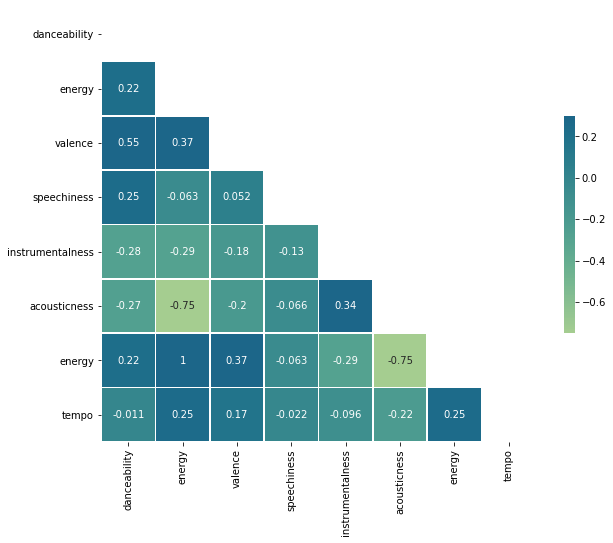

In [258]:
#Looking at the correlation between the features
fig = plt.figure(figsize=(10,8))
corr = audio_features.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap="crest",vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [259]:
#Normalization
# normalized  data by columns and save as df
audio_features_norm = pd.DataFrame(normalize(audio_features, axis=1))
#Set column names
audio_features_norm.columns = audio_features.columns
audio_features_norm.index = audio_features.index
audio_features_norm.head()


,danceability,energy,valence,speechiness,instrumentalness,acousticness,energy,tempo
song_id,,,,,,,,
0,0.007125,0.011175,0.003556,0.001408,0.000000,0.000499,0.011175,0.999842
1,0.005177,0.007266,0.004827,0.000282,0.000003,0.000153,0.007266,0.999922
2,0.006824,0.006094,0.007140,0.000460,0.008465,0.009040,0.006094,0.999837
3,0.007538,0.005856,0.008544,0.000721,0.000000,0.004566,0.005856,0.999890
4,0.003468,0.005255,0.002802,0.000302,0.000055,0.000231,0.005255,0.999962


In [260]:

"""
Music Recommender based on Cosine distance measure. Euclidean and Hammer measure can also be used
"""

def Content_filterering_recommender(song_id, N_songs):
    distance_measure = cosine
    allSongs = pd.DataFrame(audio_features_norm.index)
    allSongs = allSongs[allSongs.song_id != song_id]
    allSongs["distance"] = allSongs["song_id"].apply(
        lambda x: distance_measure(audio_features_norm.loc[song_id], audio_features_norm.loc[x]))
    # sort by distance followed by song_id, the smaller value of distance is picked.
    TopNRecommendation = allSongs.sort_values(["distance"]).head(
        N_songs).sort_values(by=['distance', 'song_id'])
    #print(data['name'].loc[song_id, :])
    Recommendation = pd.merge(TopNRecommendation, spotify_data,
                              how='inner', on='song_id')
    SongName = Recommendation[['song_id','name','artists','distance']]
    #filter and preprocess song name and artist based on song_id
    based_on = spotify_data['name'][spotify_data['song_id'] == song_id].to_string().replace('name\n', '').strip()
    based_on1 = based_on[5:]
    artist = spotify_data['artists'][spotify_data['song_id']
                                        == song_id].to_string().replace('artists\n', '').strip()
    artist1= artist[5:]
    print(f'Recommended Songs based on {based_on1} by {artist1}')
    return SongName


In [261]:
spotify_data.tail()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,song_id
3995,0.434,2019,0.705000,Josh Gad,0.730,111452,0.326,0,1Tt7zr1yDbKbT8L4jzSZ74,0.000000,8,0.103,-7.001,1,When I Am Older,70,2019-11-15,0.2600,116.893,3995
3996,0.346,1967,0.778000,Leonard Cohen,0.322,277600,0.371,0,0N7fzxjw2pLpJ9nEUq8sV3,0.000013,4,0.118,-11.097,0,Stories of the Street,41,1967-12-27,0.0337,169.638,3996
3997,0.472,2020,0.102000,"Gryffin', 'Chris Lane",0.467,219354,0.795,0,58jecLK0epwMLr9cy5vFUy,0.000000,11,0.264,-3.600,1,Hold You Tonight (with Chris Lane),69,2020-04-07,0.0687,163.837,3997
3998,0.681,1963,0.821000,Marty Robbins,0.511,112933,0.146,0,1EZ1vJpdQO6aDuGNYlB2j0,0.000000,2,0.258,-15.616,1,Dusty Winds,25,1963-12-17,0.0652,176.165,3998
3999,0.452,2002,0.000872,Stevie Ray Vaughan,0.257,320707,0.473,0,6MvGg9X7lIt64WW28Nxfxo,0.367000,6,0.320,-9.873,1,Texas Flood,46,2002-08-27,0.0331,173.750,3999


In [262]:
#insert song ID and the number of songs to be recommended based on distance measure
SongName = Content_filterering_recommender(10, 10)
SongName

Recommended Songs based on  Help Me Make It Through the Night by  Bobby Bare


,song_id,name,artists,distance
0,2363,Pause Track,Sarah Vaughan,0.000000
1,49,Standin',Townes Van Zandt,0.000001
2,3267,You're Lookin' At Country,Loretta Lynn,0.000001
3,1531,Only Daddy That'll Walk the Line,Waylon Jennings,0.000002
4,519,Mujeres Bravas,Los Rehenes,0.000002
5,3862,Mr. Moonlight,Johnny Horton,0.000002
6,2994,Swinging Mambo,Joe Cuba And His Orchestra,0.000002
7,1702,Por Muchas Razones Te Quiero,Palito Ortega,0.000002
8,2967,The Right Time - Live at Newport Jazz Festival...,Ray Charles,0.000003
9,2185,La Gran Señora,Jenni Rivera,0.000003


In [263]:
#HEIRARCHICAL CLUSTERING

In [264]:
#dataset is very large
#we will extract 2000 samples from the dataset for clustering
cluster_features = spotify_data[['danceability', 'energy', "valence",
           "speechiness", "instrumentalness", "acousticness","energy","tempo"]]
#Normalize data for clusters
# normalized  data by columns and save as df
cluster_features_norm = pd.DataFrame(normalize(cluster_features, axis=1))
#Set column names
cluster_features_norm.columns = cluster_features.columns
cluster_features_norm.index = cluster_features.index
cluster_features_norm.head()

,danceability,energy,valence,speechiness,instrumentalness,acousticness,energy,tempo
0,0.007125,0.011175,0.003556,0.001408,0.000000,0.000499,0.011175,0.999842
1,0.005177,0.007266,0.004827,0.000282,0.000003,0.000153,0.007266,0.999922
2,0.006824,0.006094,0.007140,0.000460,0.008465,0.009040,0.006094,0.999837
3,0.007538,0.005856,0.008544,0.000721,0.000000,0.004566,0.005856,0.999890
4,0.003468,0.005255,0.002802,0.000302,0.000055,0.000231,0.005255,0.999962


In [265]:
clustering_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,song_id,cluster
0,0.288,2005,0.0404,Nickelback,0.577,119787,0.905,0,5BK5IvPzmTZBGsCnYRjSue,0.00000,...,0.0685,-5.018,0,We Will Rock You,57,2005,0.1140,80.974,54268,13
1,0.580,1987,0.0184,Foreigner,0.622,250773,0.873,0,4aFNkzXifTfkc452lMHmym,0.00035,...,0.0997,-7.030,0,Heart Turns to Stone,36,1987-11-25,0.0339,120.142,102199,13
2,0.744,1925,0.9420,Jelly Roll Morton,0.711,174427,0.635,0,1Wj1hBJKbEgyFHzraDL9aD,0.88200,...,0.0744,-5.458,1,The Chant,0,1925,0.0479,104.181,742,6
3,0.960,1983,0.5130,Los Liricos De Teran,0.847,180080,0.658,0,44vPB2KOz5sKfVrZAlPhFO,0.00000,...,0.0892,-8.310,1,Roberto Ruíz,34,1983-01-01,0.0810,112.351,85022,10
4,0.265,1973,0.0218,Alice Cooper,0.328,258600,0.497,0,2zyRVV93ijUwH1SyrPcTRR,0.00519,...,0.4870,-12.033,1,Hello Hooray,37,1973,0.0286,94.567,82936,4


In [271]:
print(cluster_features_norm.shape)
clustering_data = spotify_data.copy()
print(clustering_data.shape)

(4000, 8)
(4000, 20)


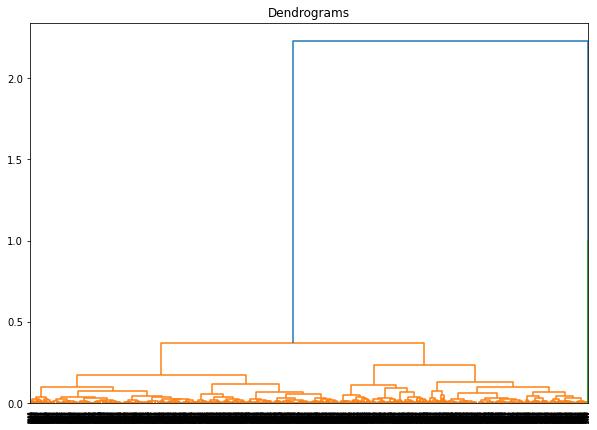

In [272]:
#Determining the number of clusters using dendograms with ward linkage 
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(cluster_features_norm, method='ward'))


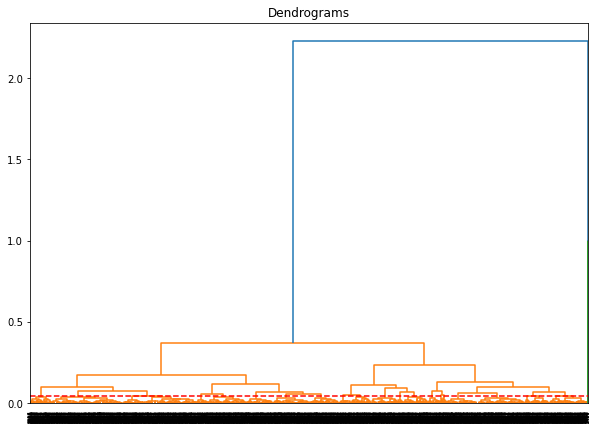

In [273]:
#Select number of clusters
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(cluster_features_norm, method='ward'))
plt.axhline(y=0.043, color='r', linestyle='--')

In [274]:
#Agglomerative clustering
#using euclidean distance affinity and ward linkage
cluster = AgglomerativeClustering(
    n_clusters=15, affinity='euclidean', linkage='ward') 
cluster_ids = cluster.fit_predict(cluster_features_norm)
#15 clusters selected

In [275]:
#Add clusters to data frame
clustering_data['cluster'] = cluster_ids
clustering_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,song_id,cluster
0,0.288,2005,0.0404,Nickelback,0.577,119787,0.905,0,5BK5IvPzmTZBGsCnYRjSue,0.00000,...,0.0685,-5.018,0,We Will Rock You,57,2005,0.1140,80.974,0,14
1,0.580,1987,0.0184,Foreigner,0.622,250773,0.873,0,4aFNkzXifTfkc452lMHmym,0.00035,...,0.0997,-7.030,0,Heart Turns to Stone,36,1987-11-25,0.0339,120.142,1,14
2,0.744,1925,0.9420,Jelly Roll Morton,0.711,174427,0.635,0,1Wj1hBJKbEgyFHzraDL9aD,0.88200,...,0.0744,-5.458,1,The Chant,0,1925,0.0479,104.181,2,0
3,0.960,1983,0.5130,Los Liricos De Teran,0.847,180080,0.658,0,44vPB2KOz5sKfVrZAlPhFO,0.00000,...,0.0892,-8.310,1,Roberto Ruíz,34,1983-01-01,0.0810,112.351,3,3
4,0.265,1973,0.0218,Alice Cooper,0.328,258600,0.497,0,2zyRVV93ijUwH1SyrPcTRR,0.00519,...,0.4870,-12.033,1,Hello Hooray,37,1973,0.0286,94.567,4,5


In [ ]:
#VISUALIZING CLUSTERS

In [276]:
clustering_data['cluster'].value_counts()

1     564
6     527
5     513
4     465
2     447
3     355
8     227
0     220
14    199
12    194
10    153
13     88
9      46
7       1
11      1
Name: cluster, dtype: int64

In [277]:
hierarchical_cluster = pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
hierarchical_cluster

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,song_id
cluster,,,,,,,,,,,,,,,,
0,0.7,1954.1,0.9,0.6,190828.7,0.4,0.0,0.8,5.5,0.2,-13.8,0.6,12.9,0.1,104.3,2031.6
1,0.4,1969.8,0.8,0.5,228026.3,0.3,0.0,0.0,5.1,0.2,-13.4,0.7,26.2,0.1,129.0,2052.5
2,0.4,1957.4,0.9,0.5,200751.6,0.2,0.0,0.0,5.2,0.2,-14.7,0.8,16.0,0.1,91.0,1928.2
3,0.7,1978.4,0.6,0.6,205903.2,0.6,0.0,0.0,5.1,0.2,-9.4,0.8,34.4,0.1,104.2,2049.8
4,0.8,1994.4,0.2,0.7,231633.8,0.7,0.2,0.0,5.6,0.2,-7.8,0.6,45.5,0.1,101.3,2057.1
5,0.5,1996.4,0.1,0.5,241172.2,0.8,0.1,0.0,5.3,0.2,-6.8,0.7,45.3,0.1,140.8,1977.3
6,0.5,1987.5,0.3,0.6,235264.6,0.5,0.1,0.0,5.1,0.2,-10.0,0.7,39.8,0.1,146.7,1985.7
7,0.0,2014.0,1.0,0.0,157041.0,0.2,1.0,0.0,7.0,0.1,-13.9,0.0,53.0,0.0,0.0,2420.0
8,0.2,1958.2,1.0,0.3,275462.2,0.1,0.0,0.9,4.9,0.2,-20.7,0.7,13.9,0.1,82.3,2059.2


In [278]:
#mode
clust_year= clustering_data.groupby('cluster')['year'].value_counts()
clust_year = pd.DataFrame(clust_year.reset_index(name="year_count"))
clust_year.head()


,cluster,year,year_count
0,0,1940,10
1,0,1955,9
2,0,1951,8
3,0,1956,8
4,0,1946,7


In [279]:
# Step 1: Group the dataframe by "clusters" column
grouped = clustering_data.groupby('cluster')
# Step 2: Count the occurrences of each year within each cluster
counts = grouped['year'].value_counts().reset_index(name='count')
# Step 3: Find the maximum count for each cluster
max_counts = counts.groupby('cluster')['count'].max().reset_index()
# Step 4: Filter the dataframe to include only the rows with maximum count
result = counts.merge(max_counts, on=['cluster', 'count'], how='inner')
# Display the result
result.head()

,cluster,year,count
0,0,1940,10
1,1,1963,20
2,2,1949,20
3,3,1960,11
4,3,1967,11


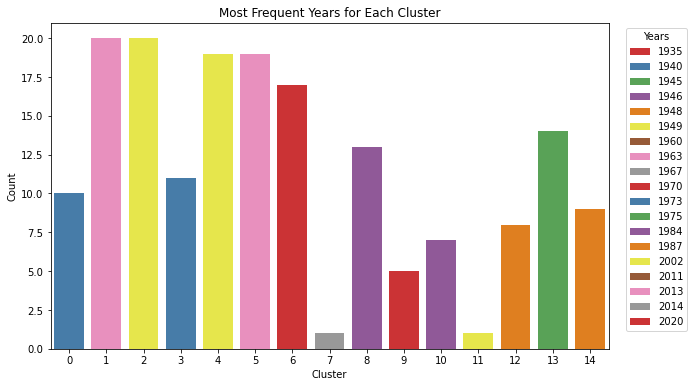

In [280]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=result, x='cluster', y='count',hue='year',
              palette='Set1', dodge=False)
plt.title('Most Frequent Years for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
# Move the legend outside the chart
ax.legend(title='Years', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

Text(0.5, 1.0, 'Average Danceability')

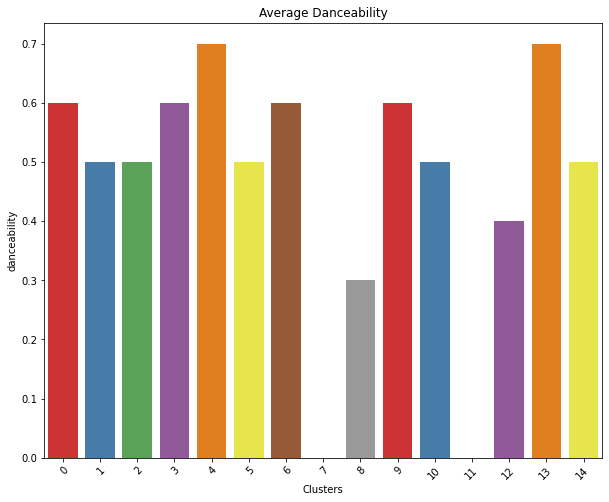

In [281]:
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=hierarchical_cluster,x=hierarchical_cluster.index,y = hierarchical_cluster['danceability'],palette='Set1')
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor')
plt.xlabel('Clusters')
plt.title('Average Danceability')

Text(0.5, 1.0, 'Average Energy')

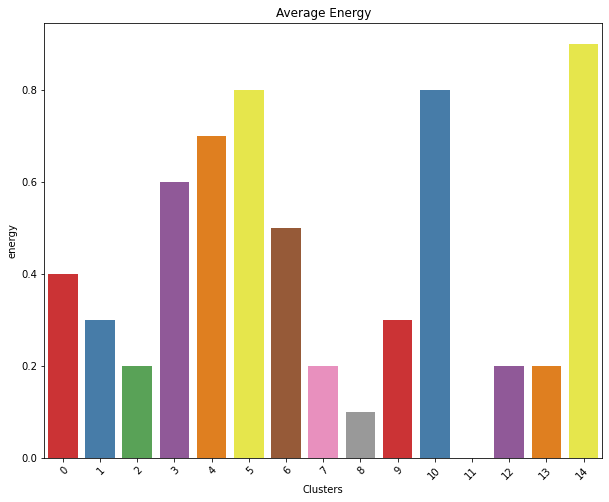

In [282]:
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=hierarchical_cluster,x=hierarchical_cluster.index,y = hierarchical_cluster['energy'],palette='Set1')
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor')
plt.xlabel('Clusters')
plt.title('Average Energy')

Text(0.5, 1.0, 'Average Valence')

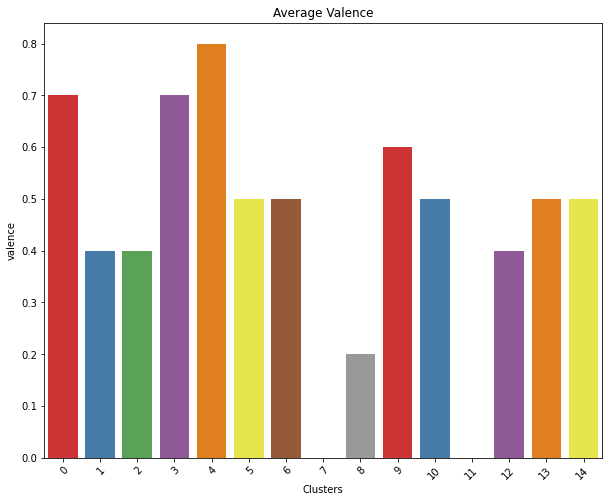

In [283]:
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=hierarchical_cluster,x=hierarchical_cluster.index,y = hierarchical_cluster['valence'],palette='Set1')
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor')
plt.xlabel('Clusters')
plt.title('Average Valence')

Text(0.5, 1.0, 'Average instrumentalness')

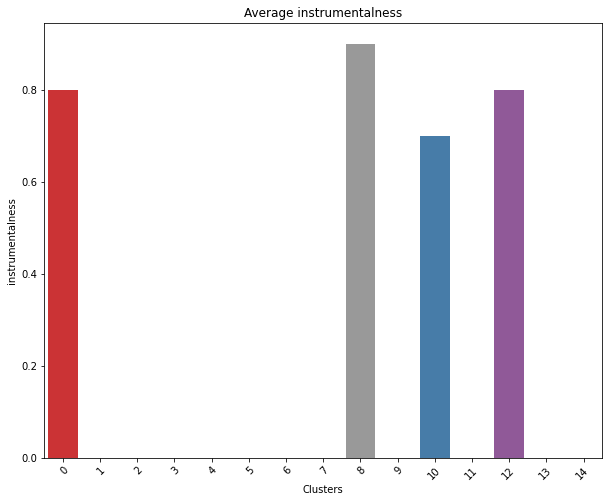

In [284]:
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=hierarchical_cluster,x=hierarchical_cluster.index,y = hierarchical_cluster['instrumentalness'],palette='Set1')
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor')
plt.xlabel('Clusters')
plt.title('Average instrumentalness')

Text(0.5, 1.0, 'Average acousticness')

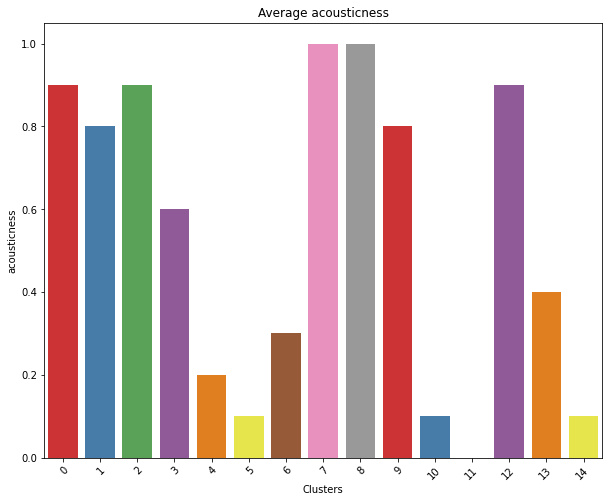

In [285]:
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=hierarchical_cluster,x=hierarchical_cluster.index,y = hierarchical_cluster['acousticness'],palette='Set1')
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor')
plt.xlabel('Clusters')
plt.title('Average acousticness')

Text(0.5, 1.0, 'Average Tempo')

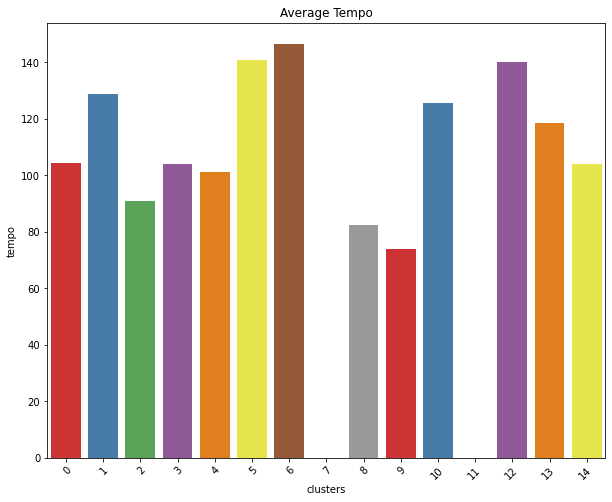

In [286]:
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=hierarchical_cluster,x=hierarchical_cluster.index,y = hierarchical_cluster['tempo'],palette='Set1')
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor')
plt.xlabel('clusters')
plt.title('Average Tempo')

Text(0.5, 1.0, 'Average speechiness')

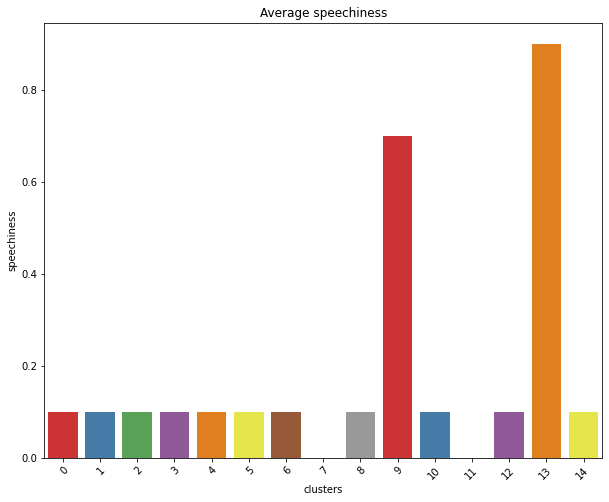

In [287]:
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=hierarchical_cluster,x=hierarchical_cluster.index,y = hierarchical_cluster['speechiness'],palette='Set1')
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor')
plt.xlabel('clusters')
plt.title('Average speechiness')

Text(0.5, 1.0, 'Average Popularity')

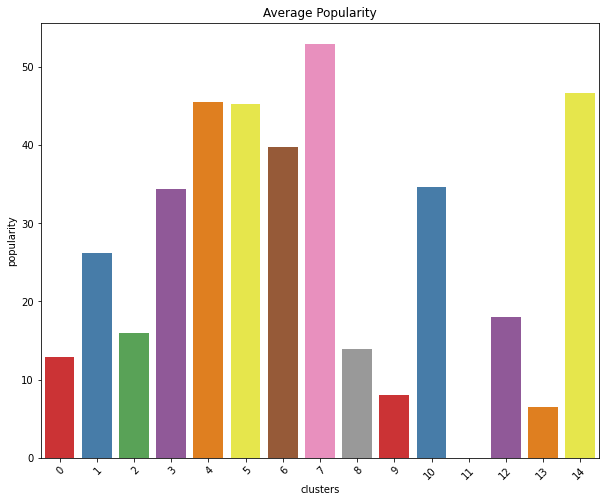

In [288]:
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=hierarchical_cluster,x=hierarchical_cluster.index,y = 'popularity',palette='Set1')
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor')
plt.xlabel('clusters')
plt.title('Average Popularity')

Text(0.5, 1.0, 'Average Key')

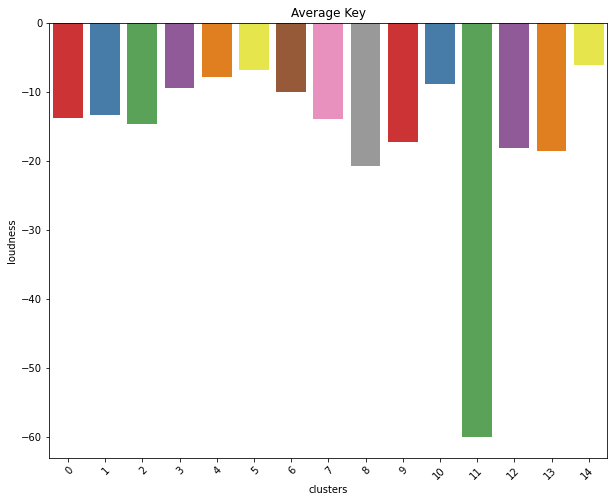

In [289]:
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=hierarchical_cluster,x=hierarchical_cluster.index,y = 'loudness',palette='Set1')
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor')
plt.xlabel('clusters')
plt.title('Average Key')

In [290]:
#hierarchical_cluster.sum(axis=1)

#### Visualising clusters

In [291]:
clustering_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,song_id,cluster
0,0.288,2005,0.0404,Nickelback,0.577,119787,0.905,0,5BK5IvPzmTZBGsCnYRjSue,0.00000,...,0.0685,-5.018,0,We Will Rock You,57,2005,0.1140,80.974,0,14
1,0.580,1987,0.0184,Foreigner,0.622,250773,0.873,0,4aFNkzXifTfkc452lMHmym,0.00035,...,0.0997,-7.030,0,Heart Turns to Stone,36,1987-11-25,0.0339,120.142,1,14
2,0.744,1925,0.9420,Jelly Roll Morton,0.711,174427,0.635,0,1Wj1hBJKbEgyFHzraDL9aD,0.88200,...,0.0744,-5.458,1,The Chant,0,1925,0.0479,104.181,2,0
3,0.960,1983,0.5130,Los Liricos De Teran,0.847,180080,0.658,0,44vPB2KOz5sKfVrZAlPhFO,0.00000,...,0.0892,-8.310,1,Roberto Ruíz,34,1983-01-01,0.0810,112.351,3,3
4,0.265,1973,0.0218,Alice Cooper,0.328,258600,0.497,0,2zyRVV93ijUwH1SyrPcTRR,0.00519,...,0.4870,-12.033,1,Hello Hooray,37,1973,0.0286,94.567,4,5


In [292]:
clustering_data.cluster.value_counts()

1     564
6     527
5     513
4     465
2     447
3     355
8     227
0     220
14    199
12    194
10    153
13     88
9      46
7       1
11      1
Name: cluster, dtype: int64

In [356]:
#Result of recommender system
song_result = SongName

In [357]:

#Add recommended song to result 
song_result = song_result.append(
    spotify_data[['song_id','name','artists']][spotify_data['song_id'] == 10])
#set distance of original song to zero
song_result = song_result.fillna(0)


In [358]:
song_result

,song_id,name,artists,distance
0,2363,Pause Track,Sarah Vaughan,0.000000
1,49,Standin',Townes Van Zandt,0.000001
2,3267,You're Lookin' At Country,Loretta Lynn,0.000001
3,1531,Only Daddy That'll Walk the Line,Waylon Jennings,0.000002
4,519,Mujeres Bravas,Los Rehenes,0.000002
5,3862,Mr. Moonlight,Johnny Horton,0.000002
6,2994,Swinging Mambo,Joe Cuba And His Orchestra,0.000002
7,1702,Por Muchas Razones Te Quiero,Palito Ortega,0.000002
8,2967,The Right Time - Live at Newport Jazz Festival...,Ray Charles,0.000003
9,2185,La Gran Señora,Jenni Rivera,0.000003


In [359]:
#get audio features of songs recommended by recommender system
song_results_fts=clustering_data[clustering_data.index.isin(song_result.song_id)]
song_results_fts.head(11)


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,song_id,cluster
10,0.890,1971,0.663,Bobby Bare,0.650,133613,0.392,0,51q4ozK5Wilju7hD7TeY2R,0.000010,...,0.2470,-13.878,1,Help Me Make It Through the Night,22,1971-01-05,0.0274,77.019,10,3
49,0.847,1971,0.763,Townes Van Zandt,0.614,201800,0.414,0,4gXGwQAY9CWGAV1LzNQRqG,0.000002,...,0.1540,-15.307,1,Standin',23,1971,0.0386,79.613,49,3
519,0.934,1993,0.693,Los Rehenes,0.817,194893,0.481,0,617Vrpi5KzZTZDVGVWN18t,0.000001,...,0.1460,-5.777,1,Mujeres Bravas,51,1993-01-01,0.0379,92.415,519,3
1531,0.864,2007,0.752,Waylon Jennings,0.620,140667,0.477,0,2ejzZzYYXIeo5thfL506Xs,0.000017,...,0.2010,-10.775,1,Only Daddy That'll Walk the Line,47,2007-05-01,0.0321,81.341,1531,3
1702,0.889,1990,0.749,Palito Ortega,0.577,200712,0.492,0,7uSEht8p9wuXz7sQfUBU47,0.000002,...,0.0913,-9.342,1,Por Muchas Razones Te Quiero,51,1990,0.0569,82.091,1702,3
2185,0.754,2009,0.605,Jenni Rivera,0.623,252440,0.398,0,3Q9Q9rYI2hwYZNl0Mmc2FB,0.000000,...,0.1250,-5.804,1,La Gran Señora,62,2009-12-01,0.0457,80.115,2185,3
2363,0.000,1949,0.000,Sarah Vaughan,0.000,5108,0.000,0,0hr9kRUi2X4MXc72A4VxG4,0.000000,...,0.0000,-60.000,0,Pause Track,0,1949,0.0000,0.000,2363,11
2967,0.721,1958,0.658,Ray Charles,0.648,244867,0.435,0,4Op8PX9aLwSza4WDwf8sB8,0.000000,...,0.6370,-14.684,0,The Right Time - Live at Newport Jazz Festival...,18,1958,0.0343,68.613,2967,3
2994,0.960,1956,0.845,Joe Cuba And His Orchestra,0.629,152963,0.434,0,1hUVIFWMyVv2TUkgTMk3Vl,0.000014,...,0.0270,-15.917,1,Swinging Mambo,5,1956-12-31,0.0300,90.333,2994,3
3267,0.900,1994,0.754,Loretta Lynn,0.641,140667,0.447,0,1kQ72jbOMbGhZgQsylugAt,0.000000,...,0.0893,-9.494,1,You're Lookin' At Country,38,1994-09-13,0.0352,76.244,3267,3


In [360]:
#filter all songs in the cluster of the recommended song which is cluster 3
cluster_filter =clustering_data[clustering_data['cluster']==3]
cluster_filter.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,song_id,cluster
3,0.960,1983,0.513,Los Liricos De Teran,0.847,180080,0.658,0,44vPB2KOz5sKfVrZAlPhFO,0.000000,...,0.0892,-8.310,1,Roberto Ruíz,34,1983-01-01,0.0810,112.351,3,3
10,0.890,1971,0.663,Bobby Bare,0.650,133613,0.392,0,51q4ozK5Wilju7hD7TeY2R,0.000010,...,0.2470,-13.878,1,Help Me Make It Through the Night,22,1971-01-05,0.0274,77.019,10,3
13,0.713,1956,0.595,Art Blakey & The Jazz Messengers,0.449,414400,0.603,0,4xH1zCrByVeiLX3xwgUgXk,0.007890,...,0.0237,-13.166,0,Infra-Rae,22,1956,0.0615,77.659,13,3
25,0.639,1980,0.289,David Bowie,0.508,418333,0.746,0,57NAaXLQGp5ZgEvpVOYtFe,0.151000,...,0.0347,-8.255,1,Teenage Wildlife - 2017 Remaster,45,1980,0.0364,108.594,25,3
29,0.815,1975,0.656,The Band,0.645,285640,0.637,0,4wqotHffqphGPqkFtJSQ5o,0.000022,...,0.2710,-7.933,0,Rags And Bones - Remastered 2001,23,1975-11-01,0.0319,113.020,29,3


In [377]:
clust_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 79 to 3937
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           88 non-null     float64
 1   year              88 non-null     int64  
 2   acousticness      88 non-null     float64
 3   artists           88 non-null     object 
 4   danceability      88 non-null     float64
 5   duration_ms       88 non-null     int64  
 6   energy            88 non-null     float64
 7   explicit          88 non-null     int64  
 8   id                88 non-null     object 
 9   instrumentalness  88 non-null     float64
 10  key               88 non-null     int64  
 11  liveness          88 non-null     float64
 12  loudness          88 non-null     float64
 13  mode              88 non-null     int64  
 14  name              88 non-null     object 
 15  popularity        88 non-null     int64  
 16  release_date      88 non-null     object 
 

In [380]:
#mean values for recommeder result
mean_songs = song_results_fts.iloc[:, [0, 2, 4, 6, 7, 9, 11, 13, 17]].mean(
    axis=0).round(4).reset_index(name='mean_values')
mean_songs = mean_songs.rename(columns={'index': 'audio_features'})
mean_songs['Method']='Content Filtering'
mean_songs


,audio_features,mean_values,Method
0,valence,0.7881,Content Filtering
1,acousticness,0.6446,Content Filtering
2,danceability,0.5969,Content Filtering
3,energy,0.4030,Content Filtering
4,explicit,0.0000,Content Filtering
5,instrumentalness,0.0000,Content Filtering
6,liveness,0.1985,Content Filtering
7,mode,0.8182,Content Filtering
8,speechiness,0.0339,Content Filtering


In [378]:
song_results_fts.iloc[:, [0, 2, 4, 5, 6, 7, 9, 11, 12, 13, 15, 17, 18]].mean(
    axis=0).round(4).reset_index(name='mean_values')

,index,mean_values
0,valence,0.7881
1,acousticness,0.6446
2,danceability,0.5969
3,duration_ms,165260.2727
4,energy,0.4030
5,explicit,0.0000
6,instrumentalness,0.0000
7,liveness,0.1985
8,loudness,-15.7298
9,mode,0.8182


In [381]:
#mean values for cluster 3
mean_clust = cluster_filter.iloc[:, [0, 2, 4, 6, 7, 9, 11, 13, 17]].mean(
    axis=0).round(4).reset_index(name='mean_values')
mean_clust=mean_clust.rename(columns={'index': 'audio_features'})
mean_clust['Method'] = 'Hierarchical clustering'
mean_clust


,audio_features,mean_values,Method
0,valence,0.7100,Hierarchical clustering
1,acousticness,0.6090,Hierarchical clustering
2,danceability,0.6248,Hierarchical clustering
3,energy,0.5571,Hierarchical clustering
4,explicit,0.0254,Hierarchical clustering
5,instrumentalness,0.0094,Hierarchical clustering
6,liveness,0.2125,Hierarchical clustering
7,mode,0.7803,Hierarchical clustering
8,speechiness,0.0704,Hierarchical clustering


In [379]:
cluster_filter.iloc[:, [0, 2, 4, 5, 6, 7, 9, 11, 12, 13, 15, 17, 18]].mean(
    axis=0).round(4).reset_index(name='mean_values')


,index,mean_values
0,valence,0.7100
1,acousticness,0.6090
2,danceability,0.6248
3,duration_ms,205903.1746
4,energy,0.5571
5,explicit,0.0254
6,instrumentalness,0.0094
7,liveness,0.2125
8,loudness,-9.4285
9,mode,0.7803


In [388]:
combined= mean_songs.append(mean_clust).reset_index()
combined = combined.drop(['index'], 1)
print(combined.shape)
combined.head()

(18, 3)


,audio_features,mean_values,Method
0,valence,0.7881,Content Filtering
1,acousticness,0.6446,Content Filtering
2,danceability,0.5969,Content Filtering
3,energy,0.4030,Content Filtering
4,explicit,0.0000,Content Filtering


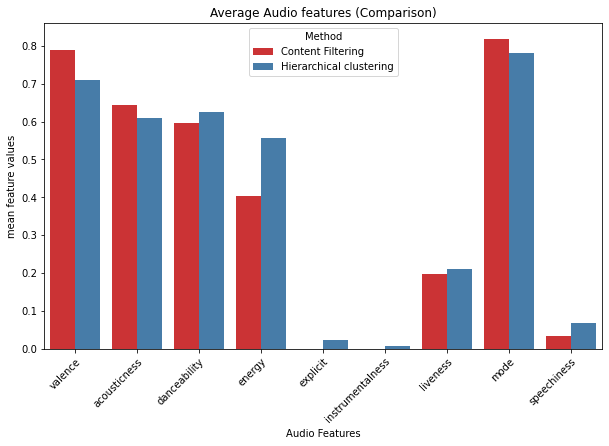

In [389]:
plt.figure(figsize=(10, 6))
sns.barplot(data=combined, x='audio_features', y='mean_values', hue='Method',
                 palette='Set1')
plt.title('Average Audio features (Comparison)')
plt.xlabel('Audio Features')
plt.ylabel('mean feature values')
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor')
plt.show()


(4, 3)


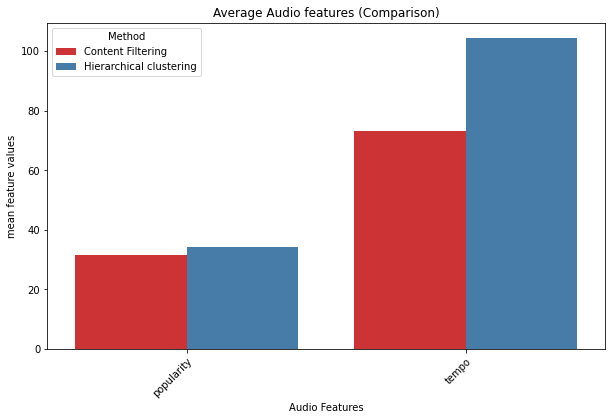

In [391]:
#compare Popularity and Tempo
#mean values for recommeder result
mean_songs1 = song_results_fts.iloc[:, [15,18]].mean(
    axis=0).round(4).reset_index(name='mean_values')
mean_songs1 = mean_songs1.rename(columns={'index': 'audio_features'})
mean_songs1['Method']='Content Filtering'

#mean values for cluster 3
mean_clust1 = cluster_filter.iloc[:, [15,18]].mean(
    axis=0).round(4).reset_index(name='mean_values')
mean_clust1=mean_clust1.rename(columns={'index': 'audio_features'})
mean_clust1['Method'] = 'Hierarchical clustering'

#combine DF
combined1 = mean_songs1.append(mean_clust1).reset_index()
combined1 = combined1.drop(['index'], 1)
print(combined1.shape)

plt.figure(figsize=(10, 6))
sns.barplot(data=combined1, x='audio_features', y='mean_values', hue='Method',
                 palette='Set1')
plt.title('Average Audio features (Comparison)')
plt.xlabel('Audio Features')
plt.ylabel('mean feature values')
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor')
plt.show()

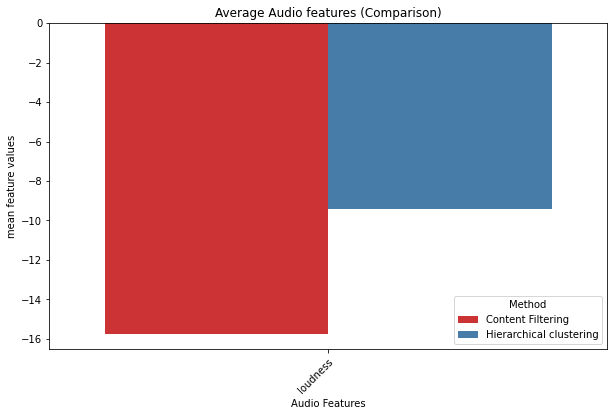

In [393]:
#compare Loudness
#mean values for recommeder result
mean_songs12 = song_results_fts.iloc[:, [12]].mean(
    axis=0).round(4).reset_index(name='mean_values')
mean_songs12 = mean_songs12.rename(columns={'index': 'audio_features'})
mean_songs12['Method']='Content Filtering'

#mean values for cluster 3
mean_clust12 = cluster_filter.iloc[:, [12]].mean(
    axis=0).round(4).reset_index(name='mean_values')
mean_clust12=mean_clust12.rename(columns={'index': 'audio_features'})
mean_clust12['Method'] = 'Hierarchical clustering'

#combine DF
combined12 = mean_songs12.append(mean_clust12).reset_index()
combined12 = combined12.drop(['index'], 1)


plt.figure(figsize=(10, 6))
sns.barplot(data=combined12, x='audio_features', y='mean_values', hue='Method',
                 palette='Set1')
plt.title('Average Audio features (Comparison)')
plt.xlabel('Audio Features')
plt.ylabel('mean feature values')
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor')
plt.show()